In [1]:
import pandas as pd
import mne
import numpy as np
from pathlib import Path
# %matplotlib notebook

In [ ]:
def eeg2raw(Path):
    

In [14]:
import pandas as pd
import mne
import numpy as np
from pathlib import Path

def brainvision2raw(data_path):

    patient_idx = data_path.name
    raw_origin = mne.io.read_raw_brainvision(data_path/'eeg'/Path(patient_idx+'.vhdr'),preload=True)
    psychopy_file = pd.read_csv(data_path/Path(patient_idx+'_psychopy.csv'))
    psychopy_file.dropna(subset=['img_file'],ignore_index=True, inplace=True)
    psychopy_file.to_csv(data_path/'00004_psychopy.csv', index=False)    # convert csv file to 160 row
    # raw_origin.plot()
    # del Stimulus/0
    del_idx = []
    for row in range(len(raw_origin.annotations)):
        if raw_origin.annotations[row]['description']=='Stimulus/0':
            del_idx.append(row)
    raw_origin.annotations.delete(del_idx)
    # calculate deviation time
    deviation = float(raw_origin.annotations[0]['onset'])-float(psychopy_file.loc[0].at['no_tag_image.started'])
    # alignment signal
    raw_origin.crop(tmin=round(deviation,3))
    raw_origin.filter(l_freq=0.1,h_freq=None)
    # print(deviation)
    # for row in range(len(raw_origin.annotations)):
    #     print(raw_origin.annotations[row])
    # #     raw_origin.annotations[row]['onset'] = round(float(raw_origin.annotations[row]['onset'] - deviation),3)
    #     raw_origin.annotations[row]['onset'] = raw_origin.annotations[row]['onset'] - deviation
    #     print(raw_origin.annotations[row]['onset'])


    # raw_origin.annotations        

    #load events
    events, event_dict = mne.events_from_annotations(raw_origin)

    # load annotations for raw and alignment
    for row in range(psychopy_file.shape[0]):
    #     print(annotations.loc[row,0])
    #     onset.append(float(annotations.loc[row,0]))
        events[row,0] = int(events[row,0] - deviation*500)    # alignment


        # update events idx
        if events[row,2]==10001:
    #         duration.append(1)

            if psychopy_file.loc[row]['like_slider.response']==1:
                events[row,2]=10003
        elif events[row,2]==10002:
            if psychopy_file.loc[row]['buy_slider.response']==1:
                events[row,2]=10004

    event_dict = {'dislike':10001, 'like':10003, 'not_buy':10002, 'buy':10004}

    annot = mne.annotations_from_events(events,sfreq=raw_origin.info['sfreq'],
                                      event_desc={10001:'dislike',10002:'not_buy',10003:'like',10004:'buy'})
    # print(annot[2])
    raw_origin.set_annotations(annot)
    raw_origin.drop_channels(['ExG 1','ExG 2','ACC22','ACC23','ACC24','Packet Counter','TRIGGER'])
    raw_origin.set_eeg_reference(ref_channels=['A2'],ch_type='eeg')
    easycap_montage = mne.channels.make_standard_montage('standard_1020')
    raw_origin.set_montage(easycap_montage)
    return raw_origin, events, event_dict

Writing ./utils/dataloaders.py


Extracting parameters from data/00004/eeg/00004.vhdr...
Setting channel info structure...
Reading 0 ... 802424  =      0.000 ...  1604.848 secs...
Used Annotations descriptions: ['Stimulus/1', 'Stimulus/3']
Applying a custom ('EEG',) reference.


<IPython.core.display.Javascript object>


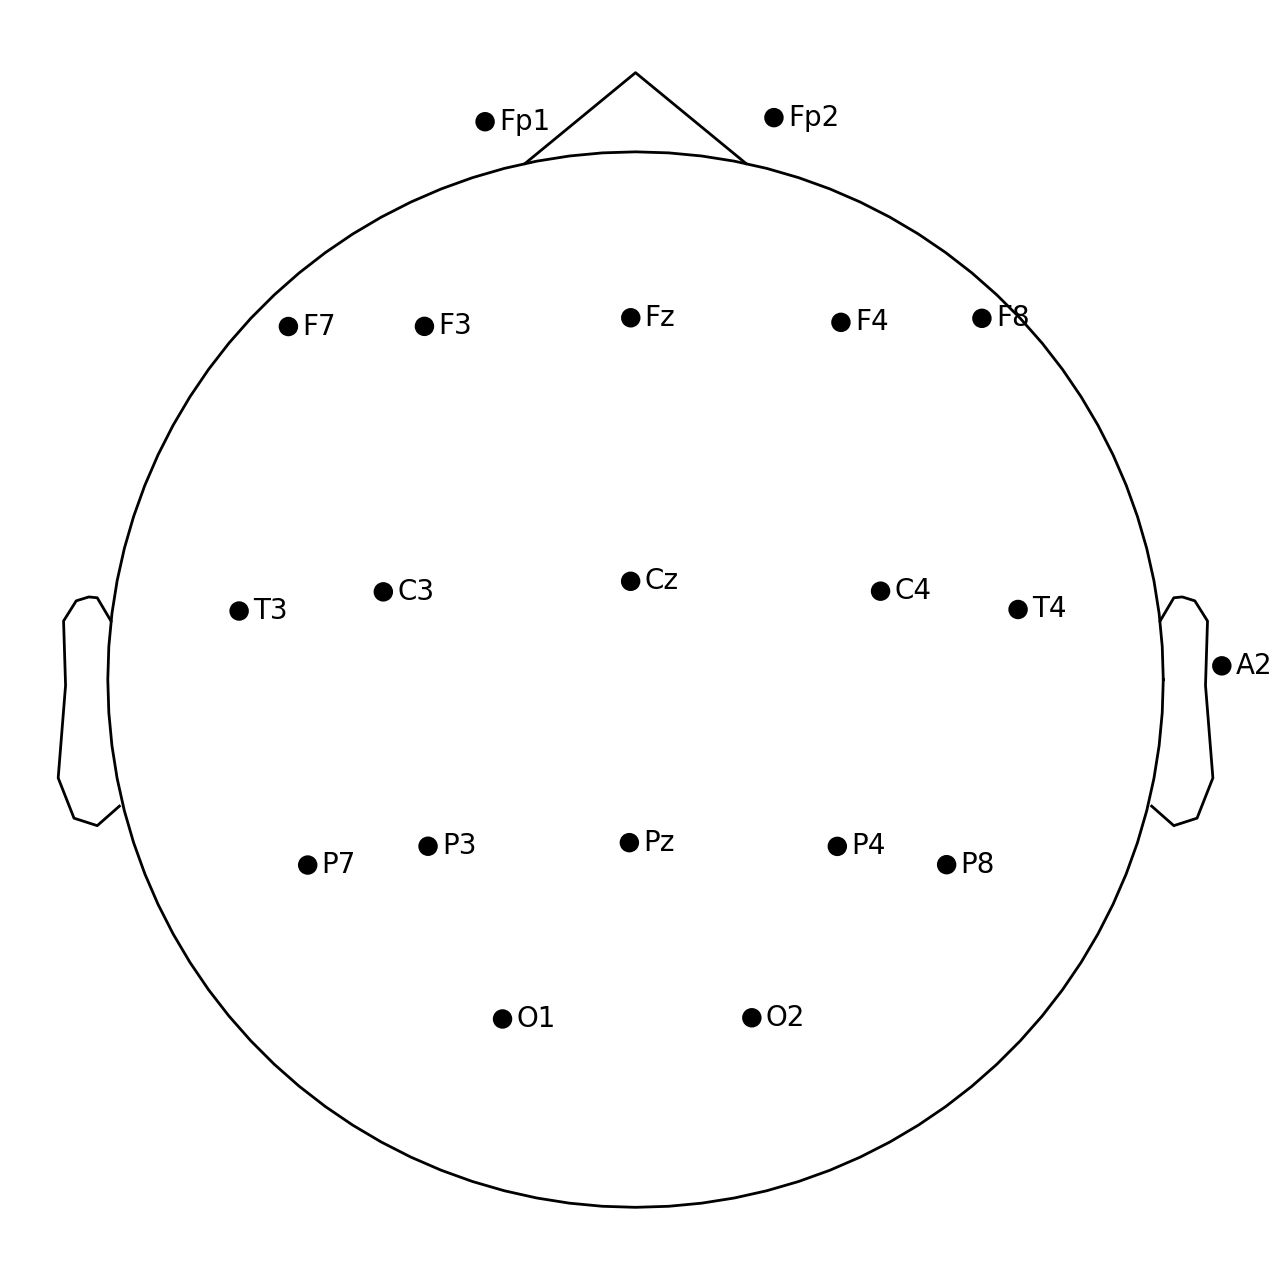

<IPython.core.display.Javascript object>


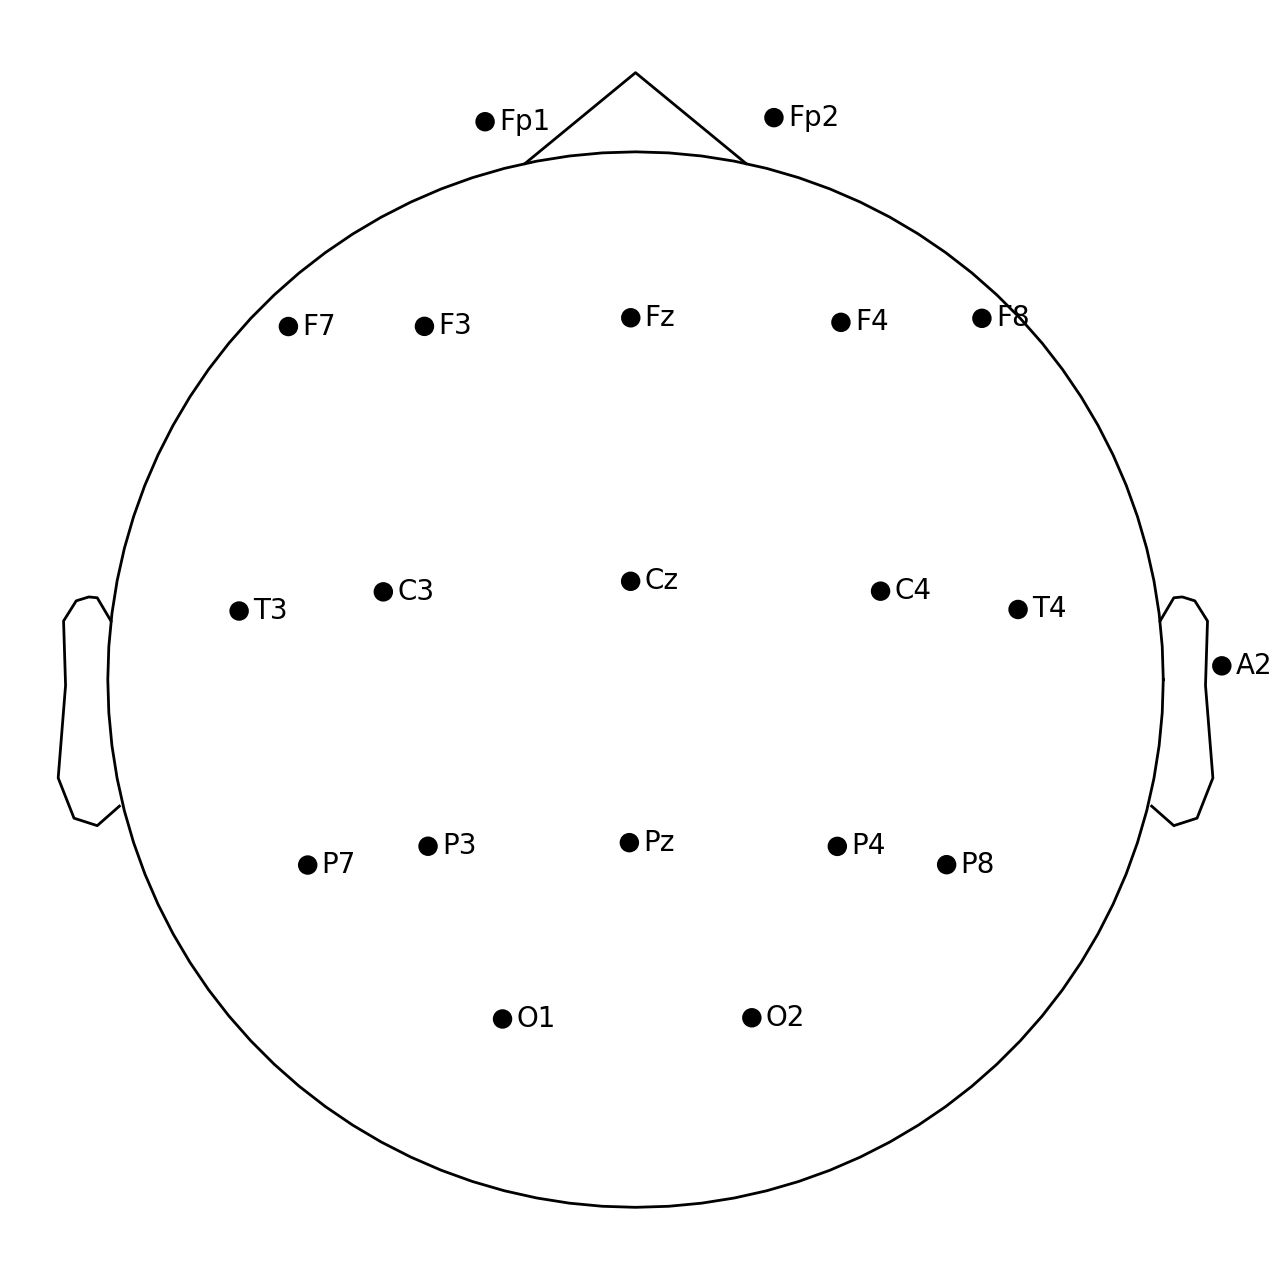

In [13]:
# data_path = Path('./data/00004')

# patient_idx = data_path.name
# raw_origin = mne.io.read_raw_brainvision(data_path/'eeg'/Path(patient_idx+'.vhdr'),preload=True)
# psychopy_file = pd.read_csv(data_path/Path(patient_idx+'_psychopy.csv'))
# psychopy_file.dropna(subset=['img_file'],ignore_index=True, inplace=True)
# psychopy_file.to_csv(data_path/'00004_psychopy.csv', index=False)    # convert csv file to 160 row
# # raw_origin.plot()
# # del Stimulus/0
# del_idx = []
# for row in range(len(raw_origin.annotations)):
#     if raw_origin.annotations[row]['description']=='Stimulus/0':
#         del_idx.append(row)
# raw_origin.annotations.delete(del_idx)
# # alignment
# deviation = float(raw_origin.annotations[0]['onset'])-float(psychopy_file.loc[0].at['no_tag_image.started'])
# # print(deviation)
# # for row in range(len(raw_origin.annotations)):
# #     print(raw_origin.annotations[row])
# # #     raw_origin.annotations[row]['onset'] = round(float(raw_origin.annotations[row]['onset'] - deviation),3)
# #     raw_origin.annotations[row]['onset'] = raw_origin.annotations[row]['onset'] - deviation
# #     print(raw_origin.annotations[row]['onset'])
    
        
# # raw_origin.annotations        
    
# #load events
# events, event_dict = mne.events_from_annotations(raw_origin)

# # load annotations for raw and alignment
# for row in range(psychopy_file.shape[0]):
# #     print(annotations.loc[row,0])
# #     onset.append(float(annotations.loc[row,0]))
#     events[row,0] = int(events[row,0] - deviation*500)    # alignment

    
#     # update events idx
#     if events[row,2]==10001:
# #         duration.append(1)
        
#         if psychopy_file.loc[row]['like_slider.response']==1:
#             events[row,2]=10003
#     elif events[row,2]==10002:
#         if psychopy_file.loc[row]['buy_slider.response']==1:
#             events[row,2]=10004

# event_dict = {'dislike':10001, 'like':10003, 'not_buy':10002, 'buy':10004}

# annot = mne.annotations_from_events(events,sfreq=raw_origin.info['sfreq'],
#                                   event_desc={10001:'dislike',10002:'not_buy',10003:'like',10004:'buy'})
# # print(annot[2])
# raw_origin.set_annotations(annot)
# raw_origin.drop_channels(['ExG 1','ExG 2','ACC22','ACC23','ACC24','Packet Counter','TRIGGER'])
# raw_origin.set_eeg_reference(ref_channels=['A2'],ch_type='eeg')
# easycap_montage = mne.channels.make_standard_montage('standard_1020')
# raw_origin.set_montage(easycap_montage)
# raw_origin.plot_sensors(show_names=True)

In [ ]:
type(events[0,2])

In [ ]:
# psychopy_file.loc[0].at['no_tag_image.started']
# raw_origin.annotations[0]['onset']
deviation = float(raw_origin.annotations[0]['onset'])-float(psychopy_file.loc[0].at['no_tag_image.started'])
# for row in range(events.shape[0]):
#     events.loc[row,0] = round((float(events.loc[row,0]) - deviation),3)

In [ ]:
# events, event_dict = mne.events_from_annotations(raw_origin)
# events[0][0]/500
for row in range(len(raw_origin.annotations)):
#     raw_origin.annotations[row]['onset'] = round((float(raw_origin.annotations[row]['onset'] - deviation),3))
#     print(raw_origin.annotations[row]['onset'])
    raw_origin.annotations[row]['onset'] = round(float(raw_origin.annotations[row]['onset'] - deviation),3)
    


In [ ]:
len(raw_origin.annotations)